# Assignment (Domain: Education)
by Khang and Vishal from M22504

### Problem Definition
We want to get a sense of how external factors affects a student's behaviour.

Furthermore, we want to examine the effects of external factors as well as a student's character (indicated by their involvement in extra-curricular activities, study time, etc...) on their grades and drinking habits.

### Summary of Dataset

> Kaggle: The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.

Domain: Education
https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-mat.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
#@title Download the U.S Education Datasets (run this cell)
#!pip install kaggle
#!mkdir ~/.kaggle
#!echo "{\"username\":\"khangtranduc\",\"key\":\"ed3dbb5c37191985a7a879e9f1ef4c73\"}" > ~/.kaggle/kaggle.json
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle datasets download uciml/student-alcohol-consumption
#!unzip student-alcohol-consumption.zip

In [3]:
#@title Define Helper Functions
def load_data():
  mat = pd.read_csv('student-mat.csv')
  por = pd.read_csv('student-por.csv')
  return (mat, por, pd.merge(mat, por, on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]))

In [4]:
mat, por, merge = load_data() # mat = math, por = portuguese

In [5]:
print(mat.shape)
print(por.shape)
print(merge.shape)

(395, 33)
(649, 33)
(382, 53)


In [6]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [7]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

# **Exploratory Data Analysis**

## Housing demographics

Text(0.5, 1.0, 'Address demographics of school student population')

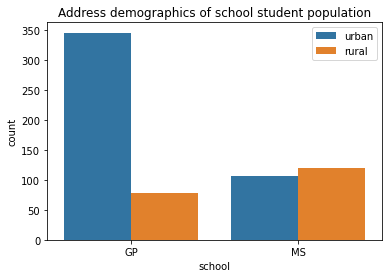

In [8]:
sns.countplot(data=por, x='school', hue='address')
plt.legend(labels=['urban','rural'])
plt.title('Address demographics of school student population')

Text(0.5, 0.98, 'Student reasons for choosing school')

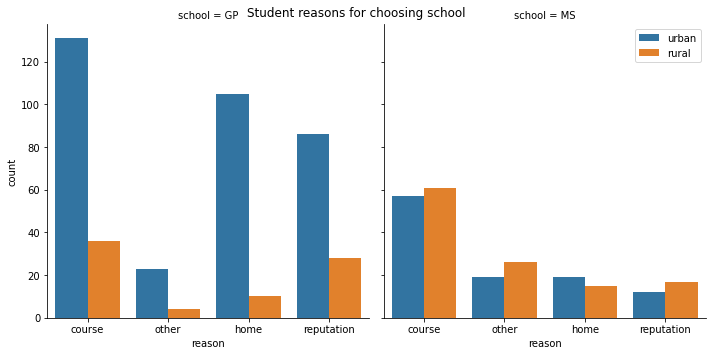

In [9]:
ax = sns.catplot(kind='count', data=por, x='reason', hue='address', col='school',legend=False)
plt.legend(labels=['urban','rural'])
ax.fig.suptitle('Student reasons for choosing school')

There is significantly less students living in rural areas that attend the Gabriel Pereira school (GP), while there seems to be more rural students attending Mousinho da Silveira school (MS).

Furthermore, we note that rural students tend to care more about the reputation of the school that they are attending than they do about how far is it from their homes.

Finally, it is evident that the main reason a student selects a school is because the courses that it offers.

## Household affairs

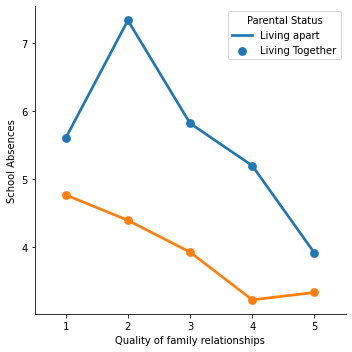

In [10]:
p = sns.catplot(kind='point', ci=None, data=por, x='famrel', y='absences', hue='Pstatus',legend=False)
p.set(xlabel='Quality of family relationships',ylabel='School Absences')
plt.legend(labels=['Living apart','Living Together'],title='Parental Status')
plt.show()

We see from the general graph that students living in broken homes generally take more absences than those who don't. Further, we see that absences decreases as the quality of family relationship increases.

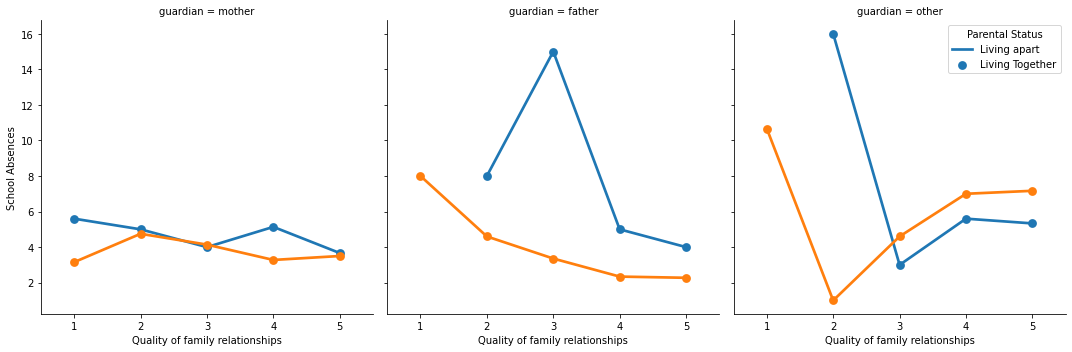

In [11]:
p = sns.catplot(kind='point', data=por, x='famrel', y='absences', ci=None, hue='Pstatus', col='guardian',legend=False)
p.set(xlabel='Quality of family relationships',ylabel='School Absences')
plt.legend(labels=['Living apart','Living Together'],title='Parental Status')

We see that if the kid stays with their mother after the divorce, the number of absences is similar to that before the divorce.

If the kid stays with someone who isn't their mother or father, the number of absences is higher than the other classes for poor family relationships.
However, an interesting trend to note is that, for better family relationships, a kid's number of absences in a broken family is actually less than that of a whole one.

## Social life

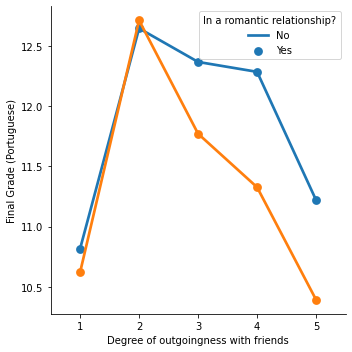

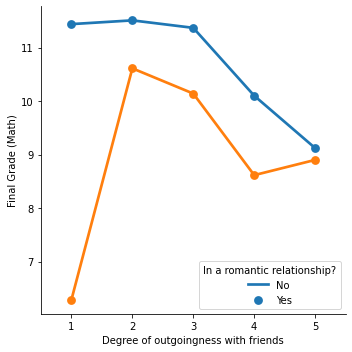

In [12]:
p = sns.catplot(kind='point', x='goout', hue='romantic', y='G3', data=por, ci=None,legend=False)
p.set(xlabel='Degree of outgoingness with friends',ylabel='Final Grade (Portuguese)')
plt.legend(labels=['No','Yes'],title='In a romantic relationship?')
p = sns.catplot(kind='point', x='goout', hue='romantic', y='G3', data=mat, ci=None,legend=False)
p.set(xlabel='Degree of outgoingness with friends',ylabel='Final Grade (Math)')
plt.legend(labels=['No','Yes'],title='In a romantic relationship?')

###**Portuguese**
For portuguese students, those who minimally go out and those who go out all the time seem to perform worse than those who are somewhere in between.

Moreover, at the optimum point of going out (2), students in a romantic relationship perform slightly better than those who aren't. While for other points, students without a romantic relationship perform better than those who are.

Furthermore, it appears that those in a romantic relationship expriences a steaper decrease in grades as they go out more.

###**Mathematics**
For mathematics students, it is interesting to note that those who are not in a romantic relationship outperform those who are for all degrees of out-going-ness.

Furthermore, single students with low degrees of out-going-ness (1) perform on par with those at the optimum degree of out-going-ness (2).
This makes sense, as portuguese is a subject that requires talking, while Mathematics does not.

It is also evident that the more a student goes out, the lower their Math grade is.

An interesting point to note is that those in a romantic relationship and are not out-going (1) (somehow these aren't mutually exclusive) perform very badly for math.

# **Data Preparation**

In [13]:
# Define an average score to simplify academic performance into a single metric
por = por.assign(G_mean = (por['G1'] + por['G2'] + por['G3'])/3)
Y = por[['Dalc', 'Walc', 'G1', 'G2', 'G3', 'G_mean']]
y = Y['G_mean']
X_impure = por.drop(columns=['Dalc', 'Walc', 'G1', 'G2', 'G3', 'G_mean'])
# categorical (nominal) features
cat = X_impure[['Mjob', 'Fjob', 'reason', 'guardian']]
# binary features
bin = X_impure[['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']]
rest = X_impure.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
# Use one-hot encoding for categorical (nominal) variables
cat_dummies = pd.get_dummies(cat)
# Use ordinal encoders for categorical (ordinal) variables
oe = OrdinalEncoder()
oe.fit(bin)
bin_bin = pd.DataFrame(oe.transform(bin), columns=oe.feature_names_in_)
X = pd.concat([bin_bin, cat_dummies, rest], axis=1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Using ML Models to predict Grades**

In [15]:
regs = ['Dummy', 'Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Regressor', 'Linear Regression with PCA', 'Decision Tree with PCA', 'Random Forest with PCA', 'Gradient Boosting Regressor with PCA']
acc = []

## Dummy Regressor
As a baseline for fairly judging the performance of our models, we will test the performance of a dummy regressor, which will always predict the median value from the training set.

In [16]:
dummy = DummyRegressor(strategy='median')
dummy.fit(x_train, y_train)
acc.append(dummy.score(x_test, y_test))
print(dummy.score(x_test, y_test))

-0.033217310630512475


## Linear Regression

In [17]:
reg = LinearRegression().fit(x_train, y_train)
y_hat = reg.predict(x_test)
acc.append(reg.score(x_test,y_test))
print(reg.score(x_test,y_test))

0.20664447390235696


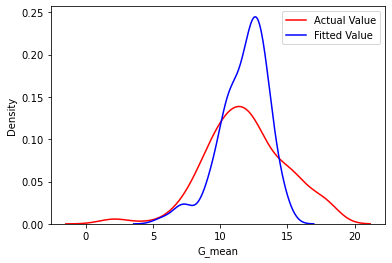

In [18]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_hat,  color='b', label='Fitted Value')
plt.legend()

While the peaks of the kde plot of the model have corresponding peaks in the actual ground truth, it is biased towards a grade near 12 (possibly because 12 is the average mean grade over the whole dataset) and underfits the ground truth.

## Decision Tree
Due to underfitting by the linear regression model, we will try a more complex decision tree that could possibly better account for the nonlinearity in the data.

In [19]:
dt = DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)
y_hat = dt.predict(x_test)
acc.append(dt.score(x_test,y_test))
print(dt.score(x_test,y_test))

0.17731101706491348


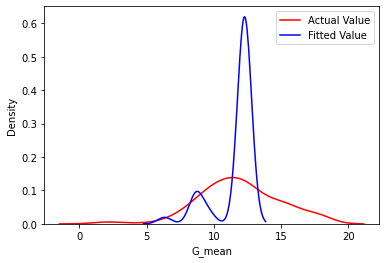

In [20]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_hat,  color='b', label='Fitted Value')
plt.legend()

The decision tree does not seem to do very well and fails to even describe the general trend of the score distribution of the test set. Perhaps making use of ensemble learning will allow the model to pick up finer trends.

## Random Forests

In [21]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(x_train, y_train)
y_hat = rf.predict(x_test)
acc.append(rf.score(x_test, y_test))
print(rf.score(x_test, y_test))

0.24339149844456065


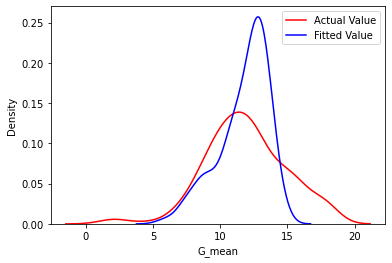

In [22]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_hat,  color='b', label='Fitted Value')
plt.legend()

The random forest model performs slightly better than the regression model as it fits well for mean grade values of 4-7, but suffers from a similar explosion in predictions.

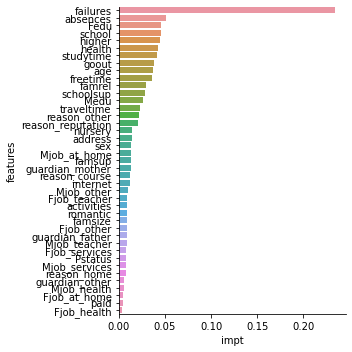

In [23]:
plot_data = pd.DataFrame({'features': list(X.columns), 'impt': rf.feature_importances_})
sns.catplot(kind='bar', data=plot_data.sort_values('impt',ascending=False), x='impt', y='features')
plt.show()

As the random forest model was able to outperform the dummy model, it must have modelled some interesting features about the dataset.

Taking a peek underneath the hood reveals that failure(the number of **past** class failures) is the strongest indicator of performance in the current class. Perhaps the old Chinese proverb of "Failure is the mother of success" isn't really far off the mark

## Gradient Boosting Regressor

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
greg = GradientBoostingRegressor()
greg.fit(x_train, y_train)
y_pred = greg.predict(x_test)
acc.append(greg.score(x_test, y_test))
print(greg.score(x_test, y_test))

0.19820021148549716


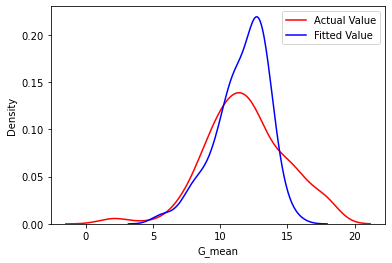

In [25]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_pred,  color='b', label='Fitted Value')
plt.legend()

### PCA
We will perform Principal component analysis to attempt to improve the model by reducing the dimensions of the problem.

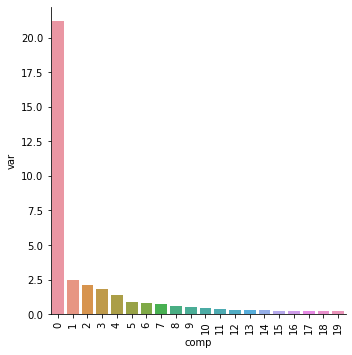

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(.95)
pcomps = pca.fit(x_train)
x_train_pcom = pca.transform(x_train)
x_test_pcom = pca.transform(x_test)
sns.catplot(kind='bar', data=pd.DataFrame({'comp': range(pca.n_components_), 'var': pca.explained_variance_}),x='comp', y='var')
plt.xticks(rotation=90)
plt.show()

In [27]:
reg = LinearRegression().fit(x_train_pcom, y_train)
y_hat = reg.predict(x_test_pcom)
acc.append(reg.score(x_test_pcom,y_test))
print(reg.score(x_test_pcom,y_test))

0.24430452942781056


The linear regression model has improved greatly, becoming the best model so far, how will the decision tree models fare?

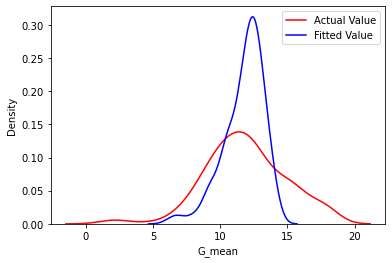

In [28]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_hat,  color='b', label='Fitted Value')
plt.legend()

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=2).fit(x_train_pcom,y_train)
y_hat = dt.predict(x_test_pcom)
acc.append(dt.score(x_test_pcom,y_test))
print(dt.score(x_test_pcom,y_test))

0.07848754987423912


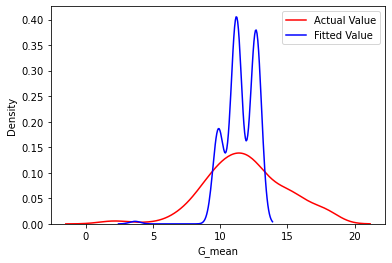

In [30]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_hat,  color='b', label='Fitted Value')
plt.legend()

In [31]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(x_train_pcom, y_train)
y_hat = rf.predict(x_test_pcom)
acc.append(rf.score(x_test_pcom, y_test))
print(rf.score(x_test_pcom, y_test))

0.20571022632536762


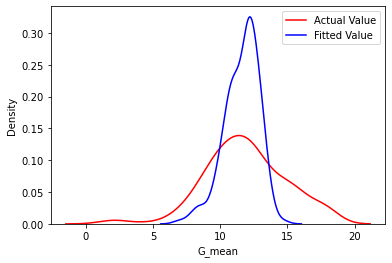

In [32]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_hat,  color='b', label='Fitted Value')
plt.legend()

The decision tree models seem to perform worse after PCA was applied! Perhaps we may improve the ensemble random forest model by making use of gradient boosting so that it can better adjust to features in the data.

In [33]:
greg = GradientBoostingRegressor()
greg.fit(x_train_pcom, y_train)
y_pred = greg.predict(x_test_pcom)
acc.append(greg.score(x_test_pcom, y_test))
print(greg.score(x_test_pcom, y_test))

0.2140069514324291


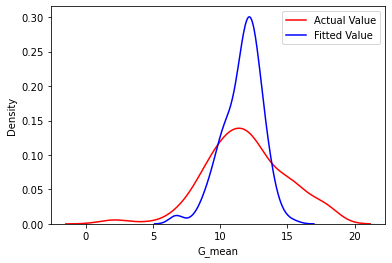

In [34]:
sns.kdeplot(y_test, color='r', label='Actual Value')
sns.kdeplot(y_pred,  color='b', label='Fitted Value')
plt.legend()

In [50]:
mdls = pd.DataFrame.from_records([{i:j for (i,j) in list(zip(regs, acc))}]).T.sort_values(by=0, axis=0, ascending=False).rename(columns={0:'Accuracy'})
mdls

,Accuracy
Linear Regression with PCA,0.244305
Random Forest,0.243391
Gradient Boosting Regressor with PCA,0.214007
Linear Regression,0.206644
Random Forest with PCA,0.205710
Gradient Boosting Regressor,0.198200
Decision Tree,0.177311
Decision Tree with PCA,0.078488
Dummy,-0.033217


From this we see that Linear Regression with PCA is the best model for the job with Random Forest coming in at a very close second

# **Using ML Models to predict Alcohol Consumption**

In [36]:
#Extract the alcohol consumption label
Y_alc = Y[['Dalc', 'Walc']] # dalc = workday alcohol consumption, walc = weekend alcohol consumption

Let's examine the relationship between this two variables and see if we can reliably use one to represent both

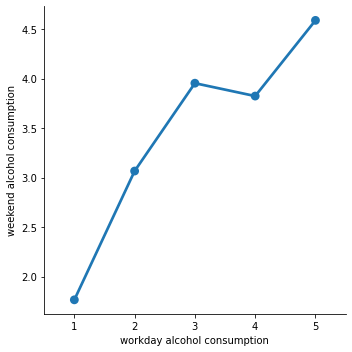

In [37]:
ax = sns.catplot(kind='point', data=Y_alc, x='Dalc', y='Walc', ci=None)
ax.set(xlabel='workday alcohol consumption',ylabel='weekend alcohol consumption')

We see that students who drink more on workdays (Dalc) also drink more on the weekends (Walc). 

As such, determining the relationship between the other features and the work day alcohol consumption is enough.

In [38]:
#We prepare our data like before
y = Y_alc['Dalc']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

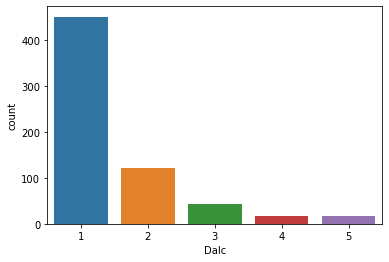

In [39]:
ax = sns.countplot(y)

The classes seems to be skewed towards 1 (very low alcohol consumption during weekdays) which makes sense. As this is a skewed class problem, the main metric that we'll be interested in is the f1 score

In [40]:
clfs = ['Dummy', 'LogisticRegression', 'Support Vector Machine', 'Perceptron', 'Random Forest', 'KNN', 'Gaussian Naive Bayes', 'Gradient Boosting Classifier']
total_f1 = []

We will start off as always with a dummy classifier.

              precision    recall  f1-score   support

           1       0.68      1.00      0.81       133
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4

    accuracy                           0.68       195
   macro avg       0.14      0.20      0.16       195
weighted avg       0.47      0.68      0.55       195



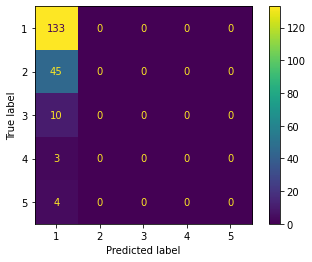

In [41]:
#Establishing a base line
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

dclf = DummyClassifier(random_state=42)
dclf.fit(x_train, y_train)
y_pred = dclf.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

We'll start with a simple Logistic Regression model using one vs. all

              precision    recall  f1-score   support

           1       0.73      0.96      0.83       133
           2       0.56      0.11      0.19        45
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4

    accuracy                           0.68       195
   macro avg       0.26      0.21      0.20       195
weighted avg       0.62      0.68      0.61       195



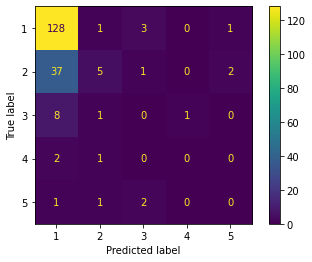

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr', random_state=42, solver='liblinear')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

We can see that the logistic regression model performed slightly better than the dummy model as it correctly classified 5 instances of the second class

              precision    recall  f1-score   support

           1       0.68      1.00      0.81       133
           2       0.00      0.00      0.00        45
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4

    accuracy                           0.68       195
   macro avg       0.14      0.20      0.16       195
weighted avg       0.47      0.68      0.55       195



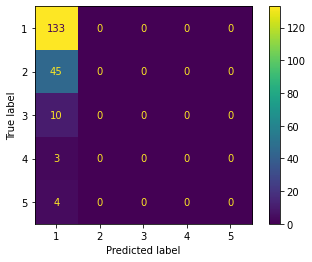

In [43]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

The support vector machine performed as bad as the dummy model as it simply predicted every thing to be in the first class

              precision    recall  f1-score   support

           1       0.70      0.96      0.81       133
           2       1.00      0.04      0.09        45
           3       0.10      0.10      0.10        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4

    accuracy                           0.67       195
   macro avg       0.36      0.22      0.20       195
weighted avg       0.72      0.67      0.58       195



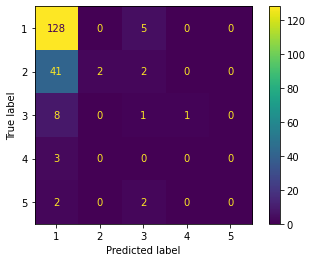

In [44]:
from sklearn.linear_model import Perceptron
per = Perceptron()
per.fit(x_train, y_train)
y_pred = per.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

Note that the Perceptron was able to correctly predict one instance of the third class.

While overall it performed worse than the other models, receiving only an accuracy of 67%

              precision    recall  f1-score   support

           1       0.69      0.99      0.81       133
           2       0.50      0.02      0.04        45
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4

    accuracy                           0.68       195
   macro avg       0.24      0.20      0.17       195
weighted avg       0.58      0.68      0.56       195



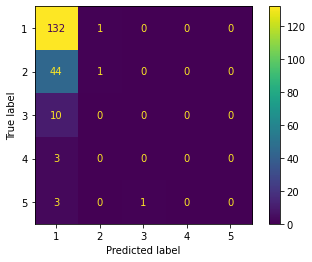

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 50, 100, 200]}
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

The Random Forest Classifier performed worse than the Logistic Regression model but slightly better than the support vector machine, seeing that it correctly classified 1 instance of the second class

              precision    recall  f1-score   support

           1       0.69      0.99      0.81       133
           2       0.25      0.02      0.04        45
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4

    accuracy                           0.68       195
   macro avg       0.19      0.20      0.17       195
weighted avg       0.53      0.68      0.57       195



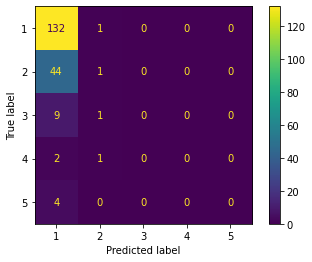

In [46]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors' : range(1,50,5)}
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=params, n_jobs=-1)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

The KNN model has a similar performance to the Random Forest

              precision    recall  f1-score   support

           1       0.57      0.03      0.06       133
           2       0.33      0.11      0.17        45
           3       0.05      0.10      0.07        10
           4       0.00      0.00      0.00         3
           5       0.01      0.25      0.02         4

    accuracy                           0.06       195
   macro avg       0.19      0.10      0.06       195
weighted avg       0.47      0.06      0.08       195



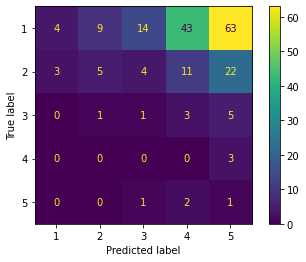

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

Gaussian Naive Bayes performed the worst out of all the models

              precision    recall  f1-score   support

           1       0.74      0.92      0.82       133
           2       0.45      0.22      0.30        45
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4

    accuracy                           0.68       195
   macro avg       0.24      0.23      0.22       195
weighted avg       0.61      0.68      0.63       195



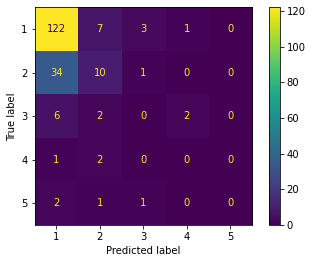

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gbclf = GradientBoostingClassifier()
gbclf.fit(x_train, y_train)
y_pred = gbclf.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
#log down the f1 score
re = classification_report(y_test, y_pred, output_dict=True)
total_f1.append(pd.DataFrame(re).loc['f1-score', '1':'5'].sum())

Gradient Boosting Classifier seems to be outperforming the Logistic Regression model with 10 examples correctly classified to the second class

In [49]:
pd.DataFrame.from_records([{i:j for (i,j) in list(zip(clfs, total_f1))}]).T.sort_values(by=0, axis=0, ascending=False).rename(columns={0:'F1-score'})

,F1-score
Gradient Boosting Classifier,1.117299
LogisticRegression,1.013664
Perceptron,0.997805
KNN,0.855631
Random Forest,0.854861
Dummy,0.810976
Support Vector Machine,0.810976
Gaussian Naive Bayes,0.310884


From the total f1 score across all classes, we find that the Gradient Boosting Classifier is the best model for the job, followed by good old Logistic Regression

## Learning Points

1. Sometimes simple models (such as log/linear regression) can do as well as more complex algorithms such as decision trees or ensemble learning. This can be due to factors such as overfitting with more complex models, and because a weaker model can be made more powerful with feature engineering.
1. Feature engineering is quite powerful in improving the performance of a model. Using PCA, we have seen how linear regression became the best-performing model despite its simplicity. 
1. Importance of EDA. Performing EDA allowed us to gain a better understanding of the dataset and allowed us to see which features were linearly correlated such that we were able to average them or just use one of the features to eliminate redundancy which was a hands-on way of performing dimensionality reduction.